In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# checking the data and knowing its properties

In [2]:
df=pd.read_csv("archive-2.zip",compression="zip")
df.drop_duplicates(inplace=True)


In [3]:
df.shape

(374, 13)

In [4]:
df["Sleep Disorder"].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [5]:
df.shape

(374, 13)

In [6]:
df.info

<bound method DataFrame.info of      Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6  

In [7]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

# Preparing the data for the machine model

In [9]:
df=df.loc[:,"Gender":"Sleep Disorder"]

In [10]:
df.shape

(374, 12)

In [11]:
v=[]
for x in df['Blood Pressure']:
        v.append(sum([int(y) for y in re.findall("\d+",str(x))])/2)
df["Blood Pressure"]=v      

In [12]:
df2=df.copy()
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,104.5,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,102.5,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,102.5,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,115.0,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,115.0,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,117.5,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,117.5,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,117.5,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,117.5,68,7000,Sleep Apnea


In [13]:
df.rename(columns={"Sleep Duration":"Sleep_Duration","Blood Pressure":"Blood_Pressure"}, inplace=True)

In [14]:
df["Blood_Pressure"]=np.ceil(df.Blood_Pressure).astype(int)
df["Sleep_Duration"]=np.ceil(df.Sleep_Duration).astype(int) 

In [15]:
numerical_feature=[feature for feature in df.columns if df[feature].dtypes=="int64"]

In [16]:
df=df[numerical_feature].copy()
df.shape

(374, 8)

#visualizing the numerical columns

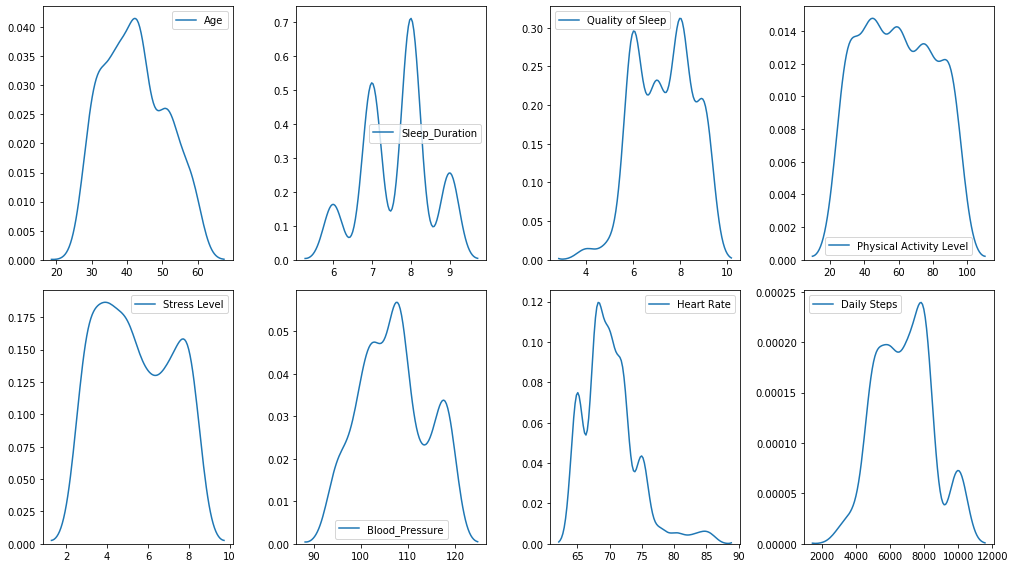

In [17]:
fig,axe = plt.subplots(nrows=2,ncols=4,figsize=(14,8))
for x,column in enumerate(numerical_feature):
    row=x//4
    col=x%4
    ax=axe[row,col]
    sns.kdeplot(data=df[column],ax=ax)
fig.tight_layout()
plt.show()

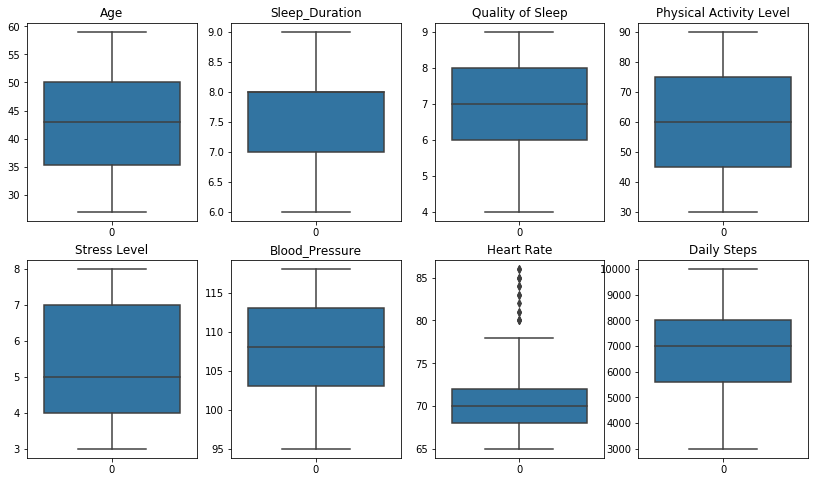

In [18]:
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(14,8))
for x,column in enumerate(numerical_feature):
    row=x//4
    col=x%4
    ax=axes[row,col]
    sns.boxplot(data=df[column],ax=ax).set(title=column)
# fig.tight_layout()
plt.show()

In [19]:
def remove_outliers(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    Iqr=q3-q1
    lower_bound= q1-(1.5*Iqr)
    upper_bound=q3+(1.5 * Iqr)
    return df[(df[col]> lower_bound) & (df[col]< upper_bound)]
    

In [20]:
for col in numerical_feature:
    remove_outliers(df,col)
    df[col].fillna(df[col].median, inplace=True)  

In [21]:
df.isna().sum()

Age                        0
Sleep_Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
Blood_Pressure             0
Heart Rate                 0
Daily Steps                0
dtype: int64

In [22]:
df.shape

(374, 8)

In [23]:
scalar=StandardScaler()
scalar.fit(df)
df=scalar.transform(df)
df=pd.DataFrame(df,columns=numerical_feature)
df

,Age,Sleep_Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood_Pressure,Heart Rate,Daily Steps
0,-1.753096,-0.747015,-1.098280,-0.825418,0.347021,-0.281305,1.654719,-1.619584
1,-1.637643,-0.747015,-1.098280,0.039844,1.475592,-0.566036,1.170474,1.970077
2,-1.637643,-0.747015,-1.098280,0.039844,1.475592,-0.566036,1.170474,1.970077
3,-1.637643,-1.911113,-2.771424,-1.402260,1.475592,1.142350,3.591698,-2.362273
4,-1.637643,-1.911113,-2.771424,-1.402260,1.475592,1.142350,3.591698,-2.362273
...,...,...,...,...,...,...,...,...
369,1.941401,1.581182,1.411435,0.760896,-1.345836,1.569447,-0.524383,0.113356
370,1.941401,0.417083,1.411435,0.760896,-1.345836,1.569447,-0.524383,0.113356
371,1.941401,1.581182,1.411435,0.760896,-1.345836,1.569447,-0.524383,0.113356
372,1.941401,1.581182,1.411435,0.760896,-1.345836,1.569447,-0.524383,0.113356


In [24]:
non_numerical_feature=[feature for feature in df2.columns if df2[feature].dtypes=="O"]

In [25]:
non_numerical_feature

['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

In [26]:
df1=df2[non_numerical_feature].copy()
df1["Occupation"].unique()
df1.shape

(374, 4)

In [27]:
df1["Sleep Disorder"]=df1["Sleep Disorder"].apply(lambda x:{"None":1,"Insomnia":2,"Sleep Apnea":3}.get(x))

In [28]:
df1

,Gender,Occupation,BMI Category,Sleep Disorder
0,Male,Software Engineer,Overweight,1
1,Male,Doctor,Normal,1
2,Male,Doctor,Normal,1
3,Male,Sales Representative,Obese,3
4,Male,Sales Representative,Obese,3
...,...,...,...,...
369,Female,Nurse,Overweight,3
370,Female,Nurse,Overweight,3
371,Female,Nurse,Overweight,3
372,Female,Nurse,Overweight,3


In [29]:
gender=pd.get_dummies(df1["Gender"],drop_first=True)
Occupation=pd.get_dummies(df1["Occupation"],drop_first=True)
BMI=pd.get_dummies(df1["BMI Category"],drop_first=True)
dummies=[gender,Occupation,BMI]

In [30]:
new_df=pd.concat([df,gender,Occupation,BMI], axis=1)

In [31]:
new_df=pd.concat([new_df,df1["Sleep Disorder"]],axis=1)

In [32]:
new_df.to_csv("new_df.csv")